In [12]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [13]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [14]:
Tickers = cac40.iloc[[5,9,29], [3]]
symbols = Tickers['Ticker'].to_list()
symbols

['BNP.PA', 'ACA.PA', 'GLE.PA']

In [15]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [16]:
data_1 = yf.Ticker(symbols[0])
data_2 = yf.Ticker(symbols[1])
data_3 = yf.Ticker(symbols[2])

BNP = data_1.history(interval ='1d', start = '2013-2-7', end = '2023-2-7')
CA = data_2.history(interval ='1d', start = '2013-2-7', end = '2023-2-7')
SG = data_3.history(interval ='1d', start = '2013-2-7', end = '2023-2-7')

In [17]:
BNP = BNP[['Close']]
CA = CA[['Close']]
SG = SG[['Close']]

In [18]:
returns_BNP = 100*BNP.Close.pct_change().dropna() 
returns_CA = 100*CA.Close.pct_change().dropna()
returns_SG = 100*SG.Close.pct_change().dropna()

# Percent change of BNP, Credit Agricole and Société Générale stocks bewteen 1 day and the next

Text(0.5, 1.0, 'BNP Returns')

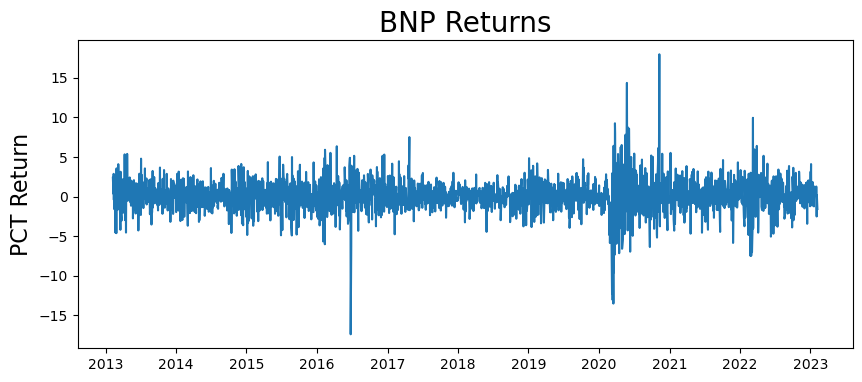

In [19]:
plt.figure(figsize=(10,4))
plt.plot(returns_BNP)
plt.ylabel('PCT Return', fontsize=16)
plt.title('BNP Returns', fontsize=20)

Text(0.5, 1.0, 'CA Returns')

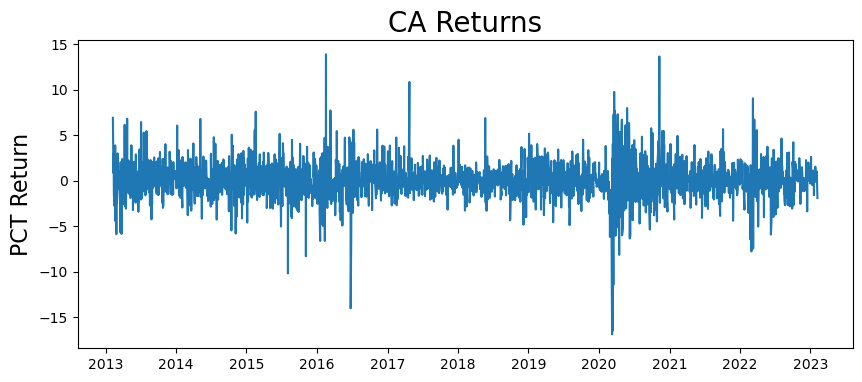

In [20]:
plt.figure(figsize=(10,4))
plt.plot(returns_CA)
plt.ylabel('PCT Return', fontsize=16)
plt.title('CA Returns', fontsize=20)

Text(0.5, 1.0, 'SG Returns')

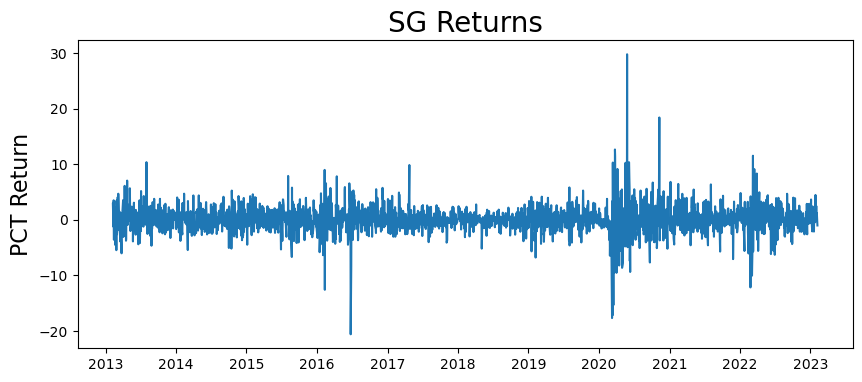

In [21]:
plt.figure(figsize=(10,4))
plt.plot(returns_SG)
plt.ylabel('PCT Return', fontsize=16)
plt.title('SG Returns', fontsize=20)

We can clearly see for both 3 graphs that they are periods of much higher volatility than other periods (volatility clustering).

Especially in 2020, due to the coronavirus pandemic.

So this 3 stock vaues return are good candidates for GARCH modelling.

**GARCH model:**

GARCH stends for Generalized Auto Regressive Conditional Heteroscedasticity. A GARCH model is used to capture volatility clustering in stock prices time series. The goal of this model is to provide a volatility measure –like a standard deviation– that can be used in financial decisions.

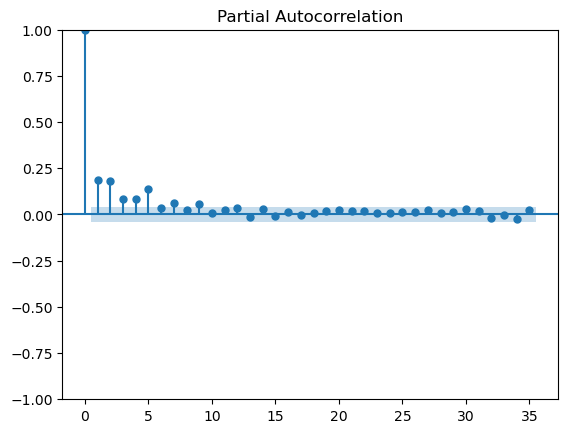

In [22]:
plot_pacf(returns_BNP**2);

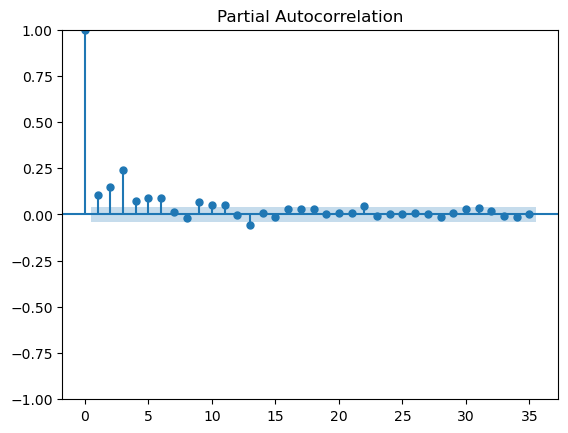

In [23]:
plot_pacf(returns_CA**2);

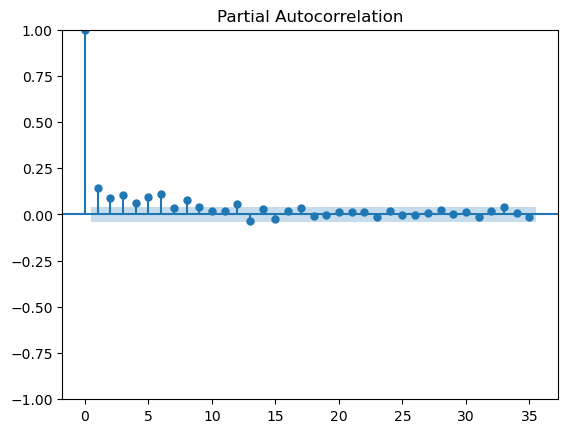

In [24]:
plot_pacf(returns_SG**2);

In [25]:
from arch import arch_model

In [26]:
model = arch_model(returns_BNP,p = 2, q = 2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2295728.69510185
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12142.598008037965
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5493.579233906469
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5727.041556686734
Iteration:      5,   Func. Count:     47,   Neg. LLF: 5111.614433577318
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5113.744275969973
Iteration:      7,   Func. Count:     64,   Neg. LLF: 5079.0447396624295
Iteration:      8,   Func. Count:     71,   Neg. LLF: 5078.941037301314
Iteration:      9,   Func. Count:     78,   Neg. LLF: 5079.790936797261
Iteration:     10,   Func. Count:     86,   Neg. LLF: 5079.04865735766
Iteration:     11,   Func. Count:     94,   Neg. LLF: 5079.279433510124
Iteration:     12,   Func. Count:    102,   Neg. LLF: 5078.77314387653
Iteration:     13,   Func. Count:    109,   Neg. LLF: 5078.776248446227
Iteration:     14,   Func. Count:    117,   Neg. LLF: 5078.770234

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5078.77
Distribution:                  Normal   AIC:                           10169.5
Method:            Maximum Likelihood   BIC:                           10204.6
                                        No. Observations:                 2560
Date:                Fri, Feb 10 2023   Df Residuals:                     2559
Time:                        17:23:19   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0586  3.212e-02      1.825  6.795e-02 [-4.324e-03,  0.122]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1276  4.782e-02      2.669  7.602e-03  [3.392e-02,  0.221]
alpha[1]       0.0780  2.007e-02      3.886  1.021e-04  [3.864e-02,  0.117]
alpha[2]       0.0828  3.020e-02      2.742  6.107e-03  [2.362e-02,  0.142]
beta[1]        0.0696  7.152e-02      0.973      0.331 [-7.059e-02,  0.210]
beta[2]        0.7395  6.554e-02     11.284  1.581e-29    [  0.611,  0.868]
===========================================================================

Covariance estimator: robust
"""

In [28]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns_BNP[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [29]:
rolling_predictions = pd.Series(rolling_predictions, index=returns_BNP.index[-365:])

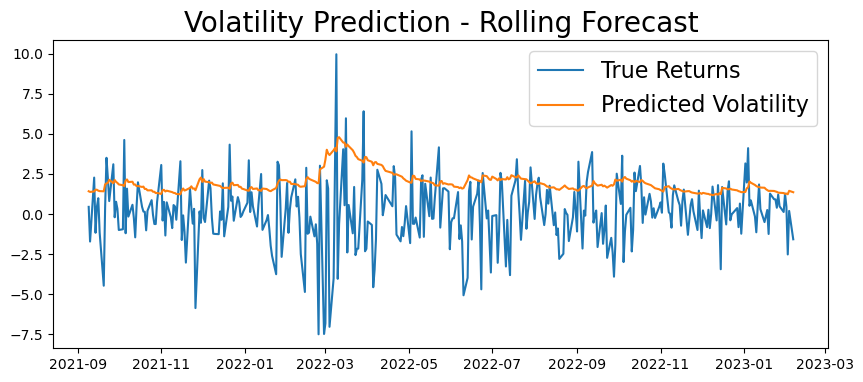

In [30]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns_BNP[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [31]:
# The orange line is the prediction of the GARCH process (volatility)

In [32]:
train = returns_BNP
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [33]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns_BNP.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

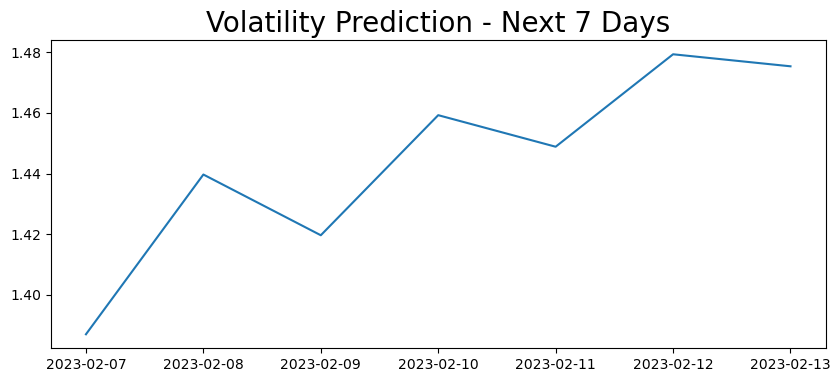

In [34]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [35]:
model = arch_model(returns_CA,p = 3, q = 3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 190203.9759002765
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1458286196.4462616
Iteration:      3,   Func. Count:     34,   Neg. LLF: 737362709.0104378
Iteration:      4,   Func. Count:     44,   Neg. LLF: 5385.423732768968
Iteration:      5,   Func. Count:     54,   Neg. LLF: 5458.709678857585
Iteration:      6,   Func. Count:     64,   Neg. LLF: 5308.495150749948
Iteration:      7,   Func. Count:     74,   Neg. LLF: 5326.52701560373
Iteration:      8,   Func. Count:     84,   Neg. LLF: 5225.148417990817
Iteration:      9,   Func. Count:     95,   Neg. LLF: 5193.263841054924
Iteration:     10,   Func. Count:    105,   Neg. LLF: 5191.853923124764
Iteration:     11,   Func. Count:    115,   Neg. LLF: 5191.856254375873
Iteration:     12,   Func. Count:    125,   Neg. LLF: 5191.4963692032325
Iteration:     13,   Func. Count:    134,   Neg. LLF: 5191.474239104474
Iteration:     14,   Func. Count:    143,   Neg. LLF: 5191.4729

In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5191.47
Distribution:                  Normal   AIC:                           10398.9
Method:            Maximum Likelihood   BIC:                           10445.7
                                        No. Observations:                 2560
Date:                Fri, Feb 10 2023   Df Residuals:                     2559
Time:                        17:24:09   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0973  3.482e-02      2.794  5.205e-03 [2.904e-02,  0.166]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2708      0.109      2.491  1.275e-02 [5.769e-02,  0.484]
alpha[1]       0.0632  2.911e-02      2.169  3.007e-02 [6.091e-03,  0.120]
alpha[2]       0.0697  3.529e-02      1.974  4.841e-02 [4.860e-04,  0.139]
alpha[3]       0.0693  2.675e-02      2.590  9.611e-03 [1.684e-02,  0.122]
beta[1]        0.0000      0.150      0.000      1.000   [ -0.294,  0.294]
beta[2]        0.0889      0.185      0.480      0.631   [ -0.274,  0.452]
beta[3]        0.6424      0.147      4.371  1.239e-05   [  0.354,  0.930]
==========================================================================

Covariance estimator: robust
"""

In [37]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns_CA[:-(test_size-i)]
    model = arch_model(train, p=3, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [38]:
rolling_predictions = pd.Series(rolling_predictions, index=returns_CA.index[-365:])

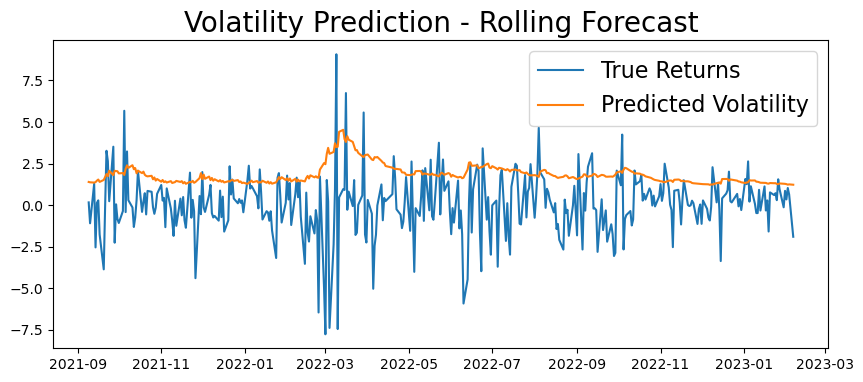

In [39]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns_CA[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)